In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

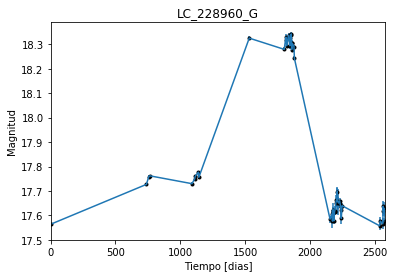

In [2]:
data = np.genfromtxt('LC_228960_G.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_228960_G')
plt.savefig("LC_228960_G.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

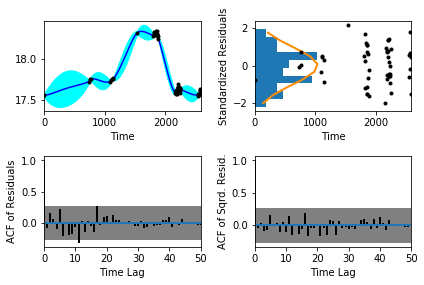

In [5]:
sample.assess_fit()

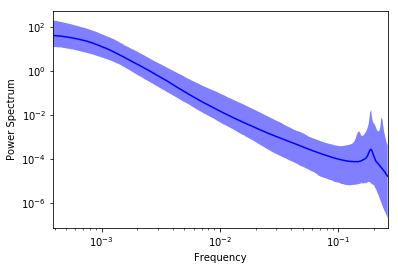

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

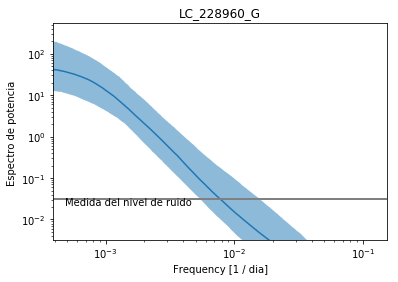

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_228960_G')
plt.savefig("Medida del nivel de ruido_G.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_228960_G')

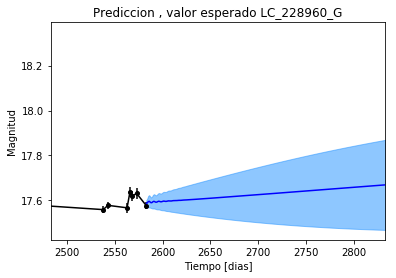

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_228960_G')

Text(0.5,1,'Prediccion, Caminos simulados_LC_228960_G')

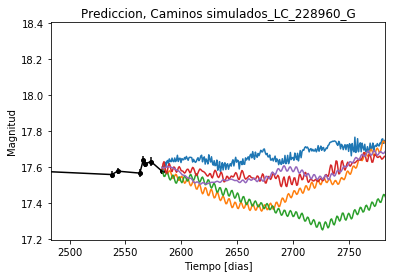

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_228960_G')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


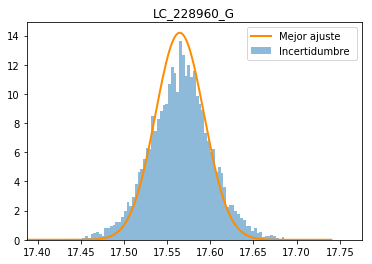

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_228960_G')
plt.savefig("Mejor_ajuste_LC_228960_G.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_228960_G')

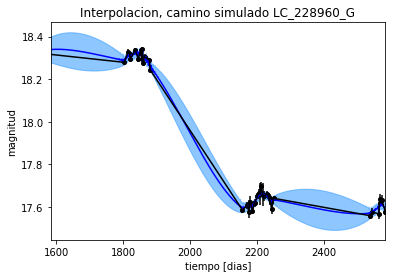

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_228960_G')

Text(0.5,1,'Interpolacion, camino simulado LC_228960_G')

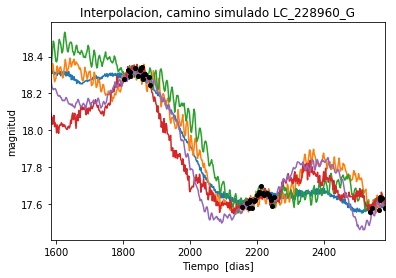

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_228960_G')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 103.678102908
Median: 0.00429665888744
Standard deviation: 0.010044621784
68% credibility interval: [ 0.00098732  0.01294085]
95% credibility interval: [ 0.00043834  0.03094205]
99% credibility interval: [ 0.00039759  0.05210944]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 97.3783192579
Median: 0.00429430691332
Standard deviation: 0.00969544701121
68% credibility interval: [ 0.00098732  0.01294081]
95% credibility interval: [ 0.00043834  0.03081739]
99% credibility interval: [ 0.00039759  0.05169503]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 95.9747596113
Median: 0.000960077225433
Standard deviation: 0.0140688788444

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 192.579754563
Median: 114.865087145
Standard deviation: 2.64951020942
68% credibility interval: [ 111.98195103  116.99777312]
95% credibility interval: [ 108.39346914  118.15140797]
99% credibility interval: [ 104.3098022  118.4895178]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 167.253790139
Median: 0.0920296593089
Standard deviation: 0.144900568677
68% credibility interval: [ 0.03458486  0.22314623]
95% credibility interval: [ 0.0199983   0.48506624]
99% credibility interval: [ 0.01466282  0.82441423]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 23.3365495811
Median: 1.72924234752
Standard deviation: 2.51547805057
68% credibility interval: [ 1.37298524  7.25691782]
95% credibility interval: [ 0.88269787  7

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 112.375288993
Median: 17.1511233701
Standard deviation: 19.2277109614
68% credibility interval: [  1.45515459e-13   3.77695888e+01]
95% credibility interval: [  1.84994546e-38   6.71391175e+01]
99% credibility interval: [  1.35901965e-99   9.71429588e+01]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 338.753882159
Median: 17.7848523006
Standard deviation: 0.191126694028
68% credibility interval: [ 17.63181391  17.93146583]
95% credibility interval: [ 17.40999811  18.17615349]
99% credibility interval: [ 17.18295494  18.6428235 ]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 24.8560411094
Median: 0.208683343762
Standard deviation: 0.102767547531
68% credibility interval: [ 0.1861772   0.42867772]
95% credibility interval: [ 0.14951676  0.43908341]
99% credibility interval: [ 0.05112241  0.49625244]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 24.8560411094
Median: 0.208683343762
Standard deviation: 0.102767547531
68% credibility interval: [ 0.1861772   0.42867772]
95% credibility interval: [ 0.14951676  0.43908341]
99% credibility interval: [ 0.05112241  0.49625244]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 248.602566428
Median: 0.000112762902775
Standard deviation: 0.0003304901

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 192.579754563
Median: 114.865087145
Standard deviation: 2.64951020942
68% credibility interval: [ 111.98195103  116.99777312]
95% credibility interval: [ 108.39346914  118.15140797]
99% credibility interval: [ 104.3098022  118.4895178]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 197.03113213
Median: 0.0930625531725
Standard deviation: 0.0946913133946
68% credibility interval: [ 0.05256891  0.18820684]
95% credibility interval: [ 0.03513299  0.36431514]
99% credibility interval: [ 0.02746126  0.54139096]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 366.270552362
Median: 1.04171337855
Standard deviation: 0.229272016708
68% credibility interval: [ 0.85194898  1.30566552]
95% credibility interval: [ 0.71116016  1.59967722]
99% credibility interval: [ 0.62339831  1.8347464 ]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 729.280828678
Median: 0.000789208499122
Standard deviation: 0.00308975168193
68% credibility interval: [ 0.00029411  0.00293644]
95% credibility interval: [ 0.00015605  0.00912776]
99% credibility interval: [  4.87696803e-05   1.74881400e-02]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 103.678102908
Median: (-0.0269967039915-0.958951321644j)
Standard deviation: 0.64878454482
68% credibility interval: [-0.08130975-1.27041564j -0.00620349-1.17360708j]
95% credibility interval: [-0.19441463-1.53197805j -0.00275419-1.44626619j]
99% credibility interval: [-0.32741328-2.71822975j -0.00249813-1.1725496j ]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 97.3783192579
Median: (-0.0269819261023+1.14593953508j)
Standard deviation: 0.648574800131
68% credibility interval: [-0.08130953+1.31119612j -0.00620349+1.17360708j]
95% credibility interval: [-0.19363136+1.32328906j -0.00275419+1.44626619j]
99% credibility interval: [-0.32480943+1.71374313j -0.00249813+1.1725496j ]
Posterior summary for parameter ar_roots  